In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import fft
from scipy import stats
from scipy.signal import get_window

In [2]:
mint = 0
maxt = 10
N = 50000
step = ( maxt - mint )/N
times = np.arange(0, 10, step)
print(times)
print(f"len(times): {len(times)}")

f_s = N/maxt
print(f"f_s = {f_s} = 1/step = {1/step}")

amplitudes1 = np.sin(5 * 2*np.pi * times)
amplitudes2 = np.sin(3 * 2*np.pi * times +np.pi)
amplitudes3 = np.sin(3 * 2*np.pi * times)
#print(f"amplitudes: {amplitudes}")
amplitudes = +amplitudes2 + amplitudes1

[0.0000e+00 2.0000e-04 4.0000e-04 ... 9.9994e+00 9.9996e+00 9.9998e+00]
len(times): 50000
f_s = 5000.0 = 1/step = 5000.0


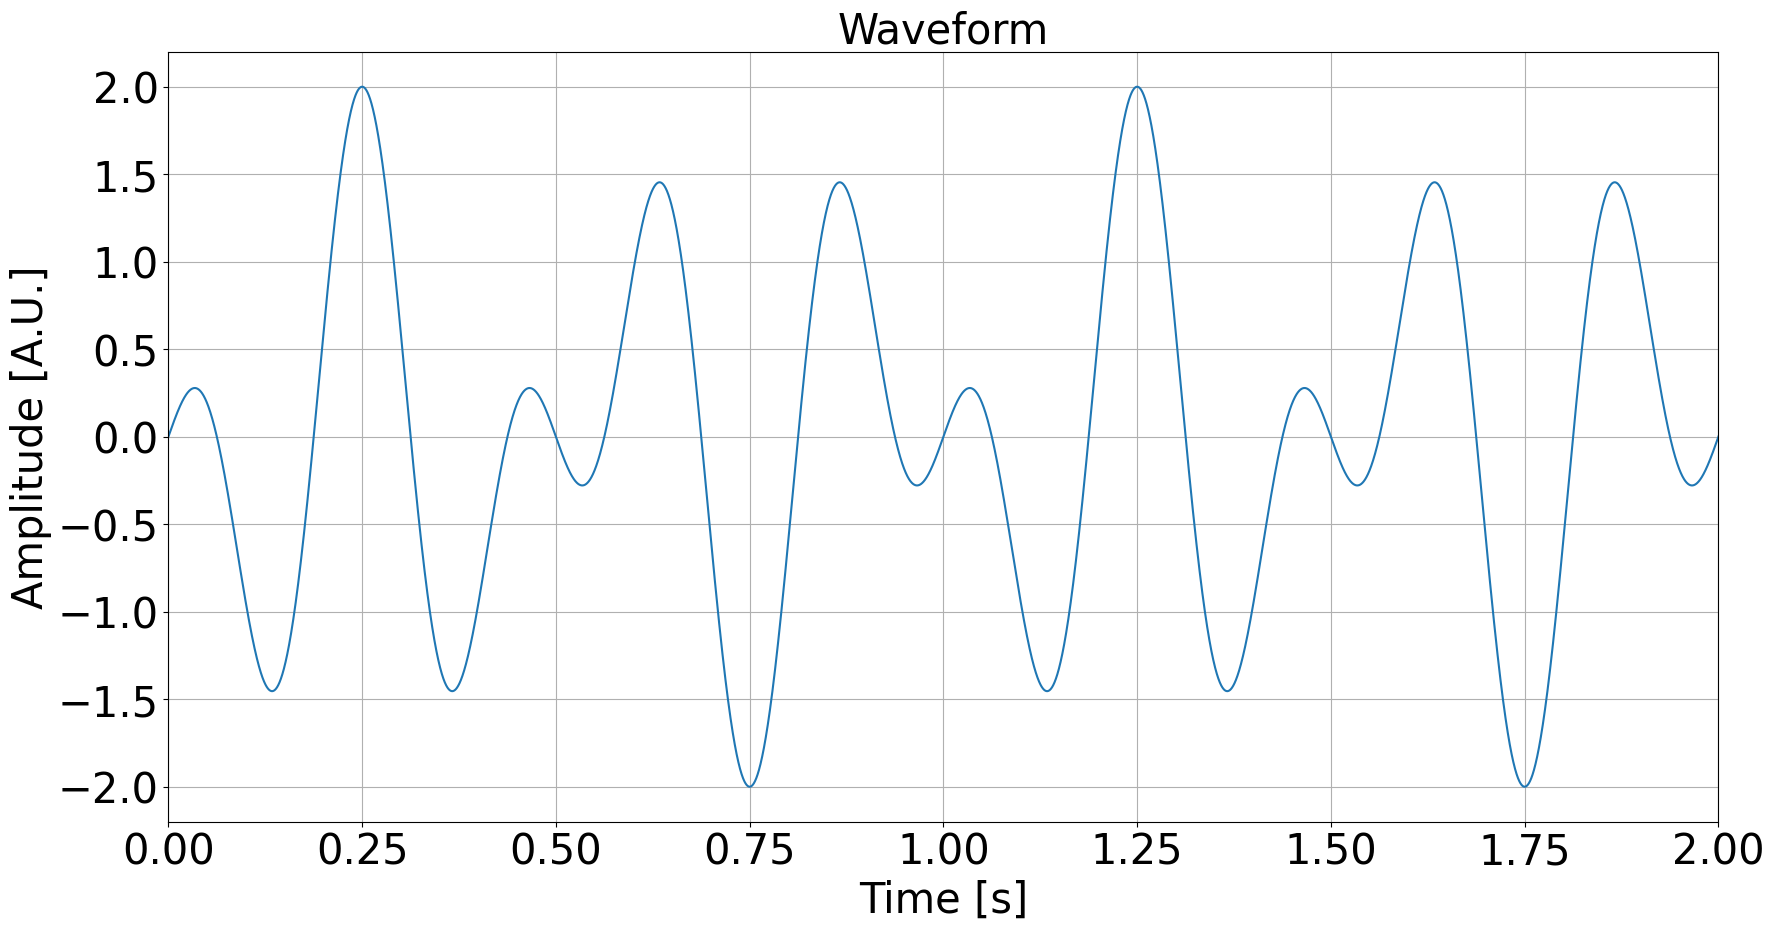

In [3]:
plt.figure(figsize = (20, 10))
plt.plot(times, amplitudes)
plt.title('Waveform', fontsize = 30)
plt.xlabel('Time [s]', fontsize = 30)
plt.xticks(fontsize = 30)
plt.ylabel('Amplitude [A.U.]', fontsize = 30)
plt.yticks(fontsize = 30)
plt.xlim(0, 2)
plt.grid(True)

#plt.savefig("Results/simple_ifft.png", format = "png", bbox_inches="tight")
#plt.savefig("Results/simple_ifft.pdf", format = "pdf", bbox_inches="tight")
plt.show()

In [4]:

freqs = fft.rfftfreq(len(times), 1/f_s)
print(freqs[-1]) ##this should be the half of f_s.

print(f"len(freqs): {len(freqs)}")
magnitudes = fft.rfft(amplitudes)
print(f"magnitudes: {magnitudes}")

2500.0
len(freqs): 25001
magnitudes: [ 1.67854844e-12+0.00000000e+00j -5.82755082e-13+1.04100582e-13j
 -8.91198438e-13+9.78073467e-13j ... -9.45331355e-14+3.53980541e-13j
 -3.64707083e-13-6.18581232e-13j  1.07416322e-13+0.00000000e+00j]


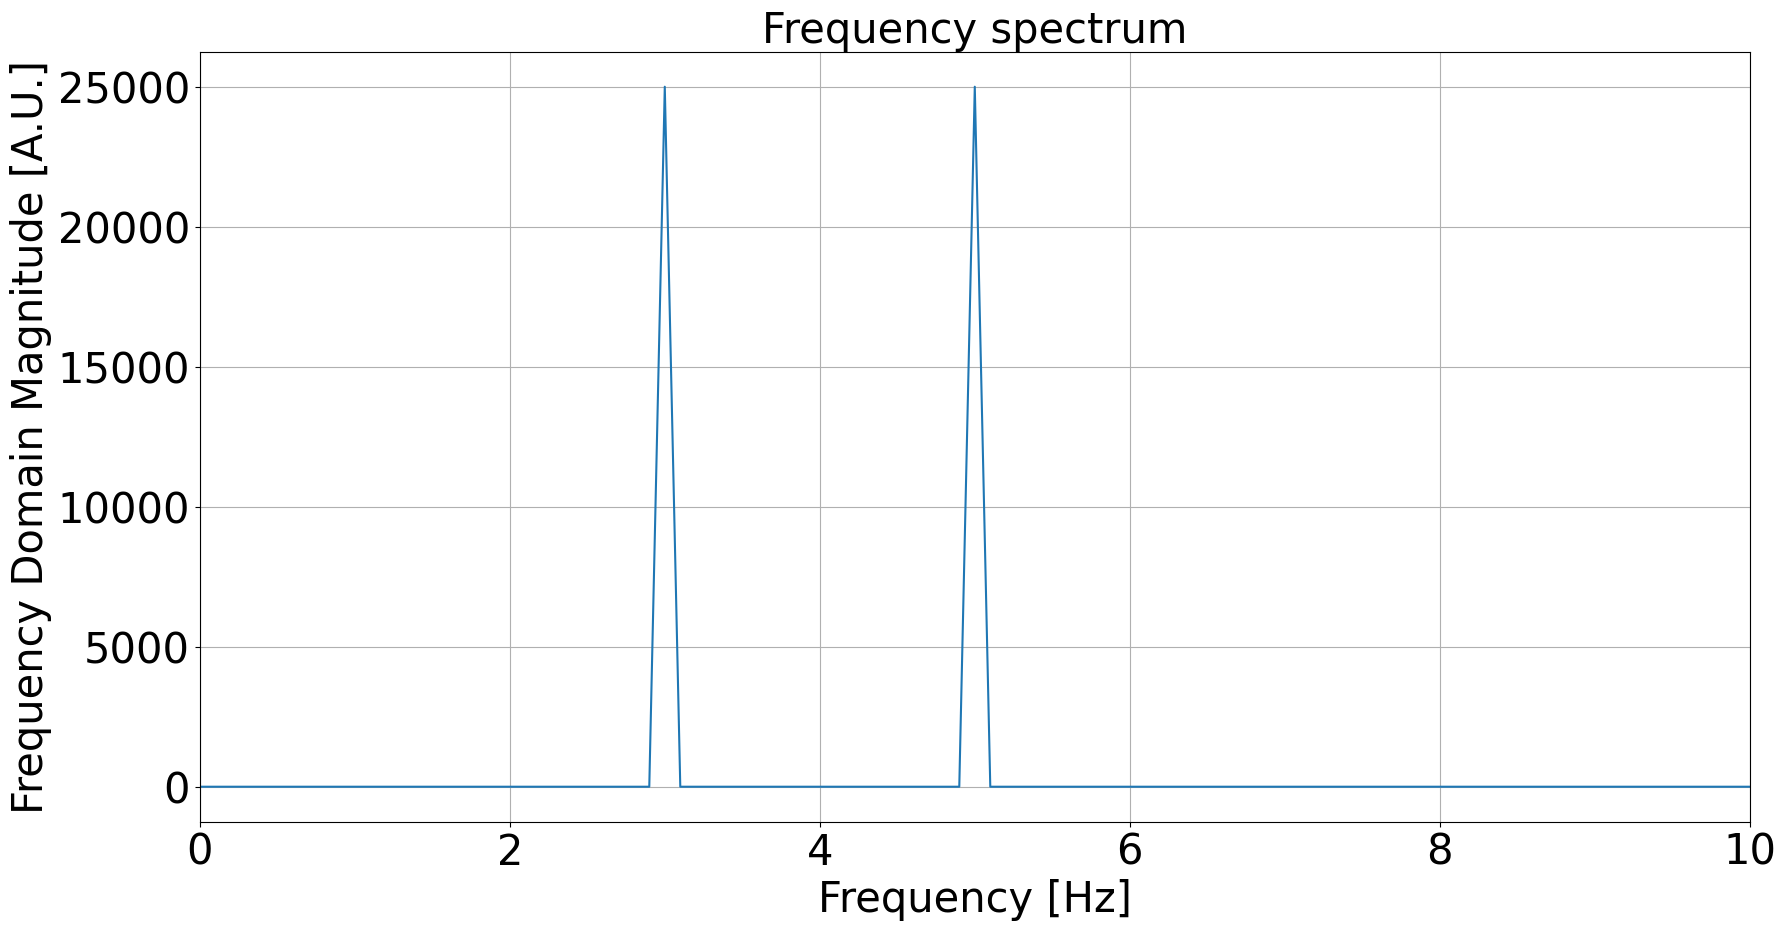

In [5]:
plt.figure(figsize=(20, 10))
plt.plot(freqs, np.abs(magnitudes))
plt.title('Frequency spectrum', fontsize = 30)
plt.xlabel('Frequency [Hz]', fontsize = 30)
plt.xticks(fontsize = 30)
plt.ylabel('Frequency Domain Magnitude [A.U.]', fontsize = 30)
plt.yticks(fontsize = 30)
plt.xlim(0, f_s /500)
plt.grid(True)

#plt.savefig("Results/simple_fft.png", format = "png", bbox_inches="tight")
#plt.savefig("Results/simple_fft.pdf", format = "pdf", bbox_inches="tight")
plt.show()

In [8]:
times_ifft = np.arange(N) / f_s 
print(f"len(times_ifft): {len(times_ifft)}")
amplitudes_ifft = fft.irfft(magnitudes)
print(f"len(amplitudes_ifft): {len(amplitudes_ifft)}")

len(times_ifft): 50000
len(amplitudes_ifft): 50000


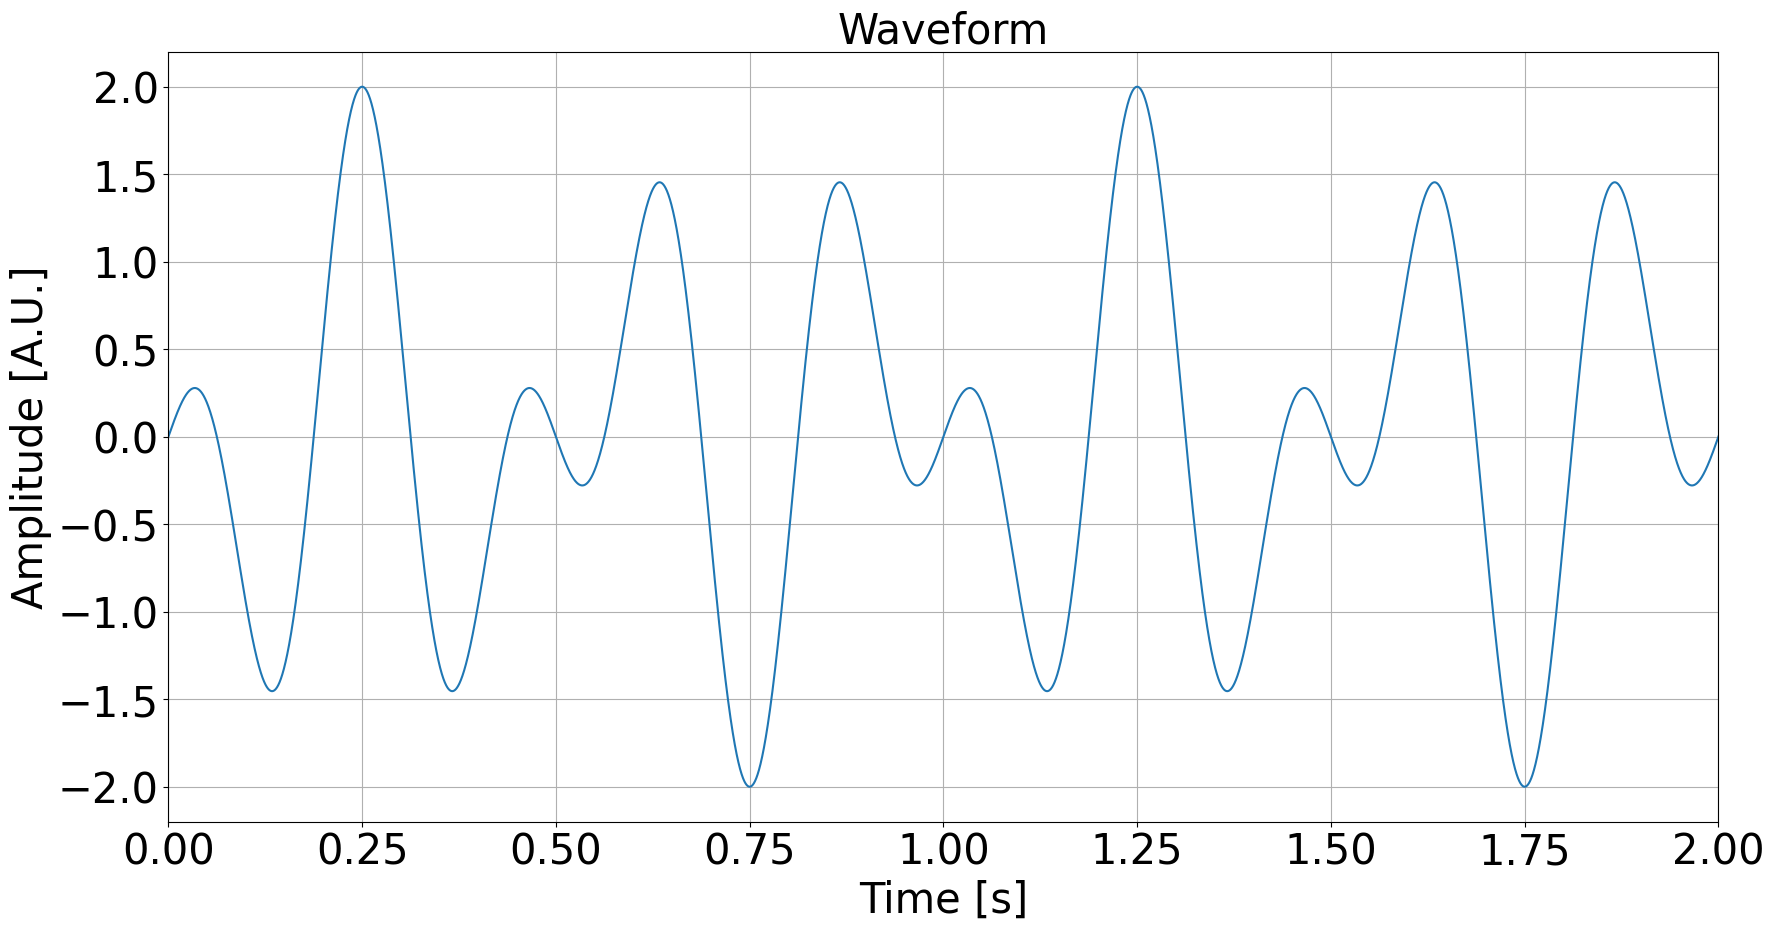

In [7]:
plt.figure(figsize = (20, 10))
plt.plot(times_ifft, amplitudes_ifft)
plt.title('Waveform', fontsize = 30)
plt.xlabel('Time [s]', fontsize = 30)
plt.xticks(fontsize = 30)
plt.ylabel('Amplitude [A.U.]', fontsize = 30)
plt.yticks(fontsize = 30)
plt.xlim(0, 2)
plt.grid(True)

#plt.savefig("Results/simple_ifft.png", format = "png", bbox_inches="tight")
#plt.savefig("Results/simple_ifft.pdf", format = "pdf", bbox_inches="tight")
plt.show()